# Practical 1.1: Basics of Machine Learning : Diabetes with linear/polynomial regression
In this practical, we will be exploring regression in machine learning.
We are trying to predict the risks of diabetes given the age, sex &

## Imports

In [157]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import matplotlib.pyplot as plt

## Loading the data
The dataset is built within scikit-learn, so we load it with:

In [158]:
diabetes = datasets.load_diabetes()
features, diabetes_risks = diabetes['data'], diabetes['target']
print(f"{len(features)} examples in the dataset")

442 examples in the dataset


Let's examine the shape of features.  
The term "shape" describes the dimensions of the numpy array

In [159]:
features.shape

(442, 10)

The shape tells us that `features` is a 2-dimensional numpy array. This means that you can imagine that `features` is a table 442 rows (_1st dimension_) and 10 columns (_2nd dimension_).

<div style="text-align:center">
<b>features is a 442 by 10 table</b>
</div>

| row no. | Age | Sex | BMI | ... |
| --- | --- | --- | --- | --- |
| 1 | 16 | M | 34 | ... |
| 2 | 14 | F | 24 | ... |
| 3  | 42 | M | 124 | ... |
| ... | ... | ... | ... | ... |

Each row represents an example in the dataset, while each column represents a feature.


This means that for each example there are 10 features, which include:
- The features include:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - ....

Correspondingly, the dataset also contains `diabeties_risks`.
This is the value that we are trying to predict.
We can random select 10 of them to take a look:

In [160]:
diabetes_risks[np.random.randint(0, 442, size=10)]

array([171.,  52., 248.,  99., 200., 128., 275., 141.,  75.,  71.])

In this task, we will try to use the features (such as BMI) and  use to predict the diabetes risk using ML model.

## Training the model
Let's see how BMI predicts the risk of diabetes

1. First we extract the BMIs from the data
    - Feature "bmi" is located in the 3rd column.
    - To get all of the elements, we use [ : ].
    - To select 3rd column, we specify [ : , 2 ].

In [161]:
bmis = features[:, 2]
bmis.shape

(442,)

2. Train a Linear Regression model
    - Create a model
    - Fit using the data

In [162]:
model = LinearRegression()
model.fit(bmis.reshape((442, 1)), diabetes_risks)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> `.reshape(442, 1)` reshapes the 442 elements   
> from 1 single column to 442 rows & 1 column

> This is because Scikit-learn expects data in the 'shape' [example, feature], a 2D array instead of a 1D array.  
> Each column represent a feature.   
> Since we have 1 feature, we have 1 column.

## Evaluating the Model
We can train our model, but we do not how it performs on unseen data.   
Thus, before we can train our model, we have to split the dataset.  
The dataset is split into train set (data to train the model) and test set (data (unseen) to test the model).

In [163]:
bmis_train, bmis_test, risks_train, risks_test = train_test_split(
    bmis.reshape((442, 1)), diabetes_risks, 
    test_size=0.3, 
    shuffle=True,
    random_state=56)

> `train_test_split` returns 4 values, so we have 4 variables to store each of these values.  
> `test_size=0.3` - sets 30% of the data as test set and the remainding 70% as train set.  
> `shuffle=True` - tells it to shuffle the data before splitting

2. Train a Linear Regression model
    - Re-create the model
    - Fit using the training data

In [164]:
model = LinearRegression()
model.fit(bmis_train, risks_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3. Get predictions from the model

In [165]:
risks_predict = model.predict(bmis_test)

4. Evaluate the model from it's predictions

In [166]:
mse_test = mean_squared_error(risks_predict, risks_test)
print(f'This model has a mean squared error of {mse_test} in it\'s test set')

This model has a mean squared error of 3563.1714710436554 in it's test set


In [167]:
risks_predict_train = model.predict(bmis_train)
mse_train = mean_squared_error(risks_predict_train, risks_train)
print(f'On the other hand, the model has a mean squared error of {mse_train} in it\'s train set')

On the other hand, the model has a mean squared error of 4033.5061345568174 in it's train set


5. Visualise the model

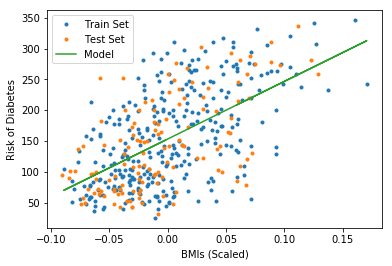

In [168]:
plt.plot(bmis_train, risks_train, '.', label='Train Set')
plt.plot(bmis_test, risks_test, '.', label='Test Set')
plt.plot(bmis_train, risks_predict_train, '-', label='Model')

plt.xlabel('BMIs (Scaled)')
plt.ylabel('Risk of Diabetes')

plt.legend()

6. Plot learning curves

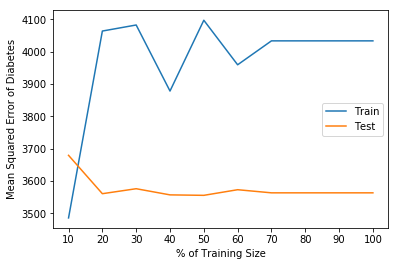

In [169]:
train_scores = []
test_scores = []

for i in np.arange(0.1, 1.1, 0.1):
    # 442 can be substituted for len(X_train)
    train_size = int(442 * i)
    # print(f"{train_size}")
    X_train = bmis_train[:train_size]
    X_test = bmis_test
    y_train = risks_train[:train_size]
    y_test = risks_test

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train_pred, y_train)
    test_mse = mean_squared_error(y_test_pred, y_test)
    
    train_scores.append(train_mse)
    test_scores.append(test_mse)
    
plt.plot(train_scores)
plt.plot(test_scores)

plt.ylabel('Mean Squared Error of Diabetes')
plt.xlabel('% of Training Size')

plt.xticks(range(10), (np.arange(0.1, 1.1, 0.1) * 100).astype(int))

plt.legend(['Train', 'Test'])

## Iterate
Now let's try with Polynomial Regression

1. Create more features from feature "age"

In [170]:
poly_features = PolynomialFeatures(degree=5)
bmis_poly = poly_features.fit_transform(bmis.reshape((442,1)))

2. Split into train & test set

In [171]:
bmis_train, bmis_test, risks_train, risks_test = train_test_split(
    bmis_poly, diabetes_risks,
    test_size=0.3,
    shuffle=True,
    random_state=56
)

3. Train a Polynomial Regression Model
    - Re-create the model
    - Fit using the data

In [172]:
model = LinearRegression()
model.fit(bmis_train, risks_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

4. Get predictions from the model

In [173]:
risks_predict_train = model.predict(bmis_train)
risks_predict_test = model.predict(bmis_test)

5. Evaluate the model from it's predictions

In [174]:
mse_train = mean_squared_error(risks_predict_train, risks_train)
mse_test = mean_squared_error(risks_predict_test, risks_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: 4017.402652194019
Test MSE: 3501.6009676913254


5. Visualise the model

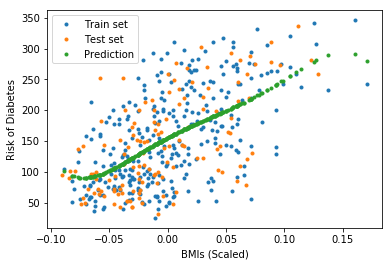

In [175]:
plt.plot(bmis_train[:,1], risks_train, '.')
plt.plot(bmis_test[:,1], risks_test, '.')
plt.plot(bmis_train[:,1], risks_predict_train, '.')

plt.xlabel('BMIs (Scaled)')
plt.ylabel('Risk of Diabetes')

plt.legend(['Train set', 'Test set', 'Prediction'])

6. Plot learning curves

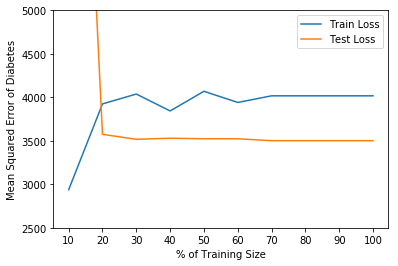

In [176]:
train_scores = []
test_scores = []

for i in np.arange(0.1, 1.1, 0.1):
    # 442 can be substituted for len(X_train)
    train_size = int(442 * i)
    X_train = bmis_train[:train_size]
    X_test = bmis_test
    y_train = risks_train[:train_size]
    y_test = risks_test

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train_pred, y_train)
    test_mse = mean_squared_error(y_test_pred, y_test)
    
    train_scores.append(train_mse)
    test_scores.append(test_mse)
    
plt.plot(train_scores, label="Train Loss")
plt.plot(test_scores, label="Test Loss")

plt.ylabel('Mean Squared Error of Diabetes')
plt.xlabel('% of Training Size')

plt.xticks(range(10), (np.arange(0.1, 1.1, 0.1) * 100).astype(int))
plt.ylim(2500, 5000)

plt.legend()

## Putting all the features together
Using Polynomial Regression

1. Create more features from all the features

In [177]:
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(features)

2. Split into train & test set

In [178]:
y = diabetes_risks

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y,
    test_size=0.3,
    shuffle=True,
    random_state=56
)

3. Train a Polynomial Regression Model

In [179]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

4. Get predictions from the model

In [180]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

5. Evaluate the model

In [181]:
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: 1.3087743797793447e-22
Test MSE: 73125.36589492924


6. Plot the learning curve

2551.0097010624813
3050.426676367577


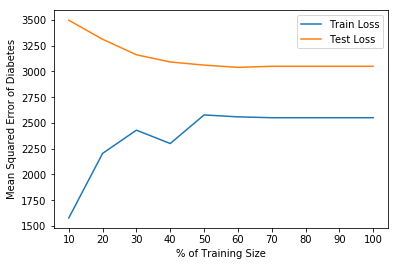

In [182]:
train_scores = []
test_scores = []

for i in np.arange(0.1, 1.1, 0.1):
    # 442 can be substituted for len(X_train)
    train_size = int(442 * i)
    X_train_new = X_train[:train_size]
    y_train_new = y_train[:train_size]

    model = Ridge(alpha=4e-3)
    model.fit(X_train_new, y_train_new)
    y_train_pred = model.predict(X_train_new)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train_pred, y_train_new)
    test_mse = mean_squared_error(y_test_pred, y_test)
    
    train_scores.append(train_mse)
    test_scores.append(test_mse)

print(train_scores[-1])
print(test_scores[-1])
    
plt.plot(train_scores, label="Train Loss")
plt.plot(test_scores, label="Test Loss")

plt.ylabel('Mean Squared Error of Diabetes')
plt.xlabel('% of Training Size')

plt.xticks(range(10), (np.arange(0.1, 1.1, 0.1) * 100).astype(int))
plt.legend()

## Other Models
#### Random Forest